In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import math
from scipy import stats

In [2]:
def phi(X,mean,var):
    std = math.sqrt(var)
    pdf = (np.pi*std) * np.exp(-0.5*((X-mean)/std)**2)
    return pdf

In [3]:
def generateNormalDist(n):
    X = np.linspace(-4,4,n)
    return X

In [4]:
def plotScatterHist(X):
    _Xvalue = np.asarray(X)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    plt.subplot(121)
    plt.scatter(np.arange(_Xvalue.size), _Xvalue, c='red')
    plt.xlabel('Sample no.')
    plt.ylabel('Value')
    plt.title('Scatter plot')
    plt.subplot(122)
    plt.hist(_Xvalue, bins=50)
    #plt.plot(X,phi(X))
    plt.title('Histogram')
    fig.subplots_adjust(wspace=.3)
    plt.show()

In [5]:
def reqFunction(X):
    return 0.75*stats.norm.pdf(X,0,1)+0.25*stats.norm.pdf(X,1.5,1/3)

In [6]:
def Sampling(n,func,X):
    SampleIndex = random.sample(range(0, X.size), 1000)
    Sample=[]
    X_dash=[]
    
    for i in range(len(SampleIndex)):
        Sample.append(func[SampleIndex[i]])
        X_dash.append(X[SampleIndex[i]])
    
    return np.asarray(X_dash),np.asarray(Sample)

In [7]:
def plotter(finalX):
    mu = np.mean(finalX)
    sigma = math.sqrt(np.var(finalX))
    count, bins, ignored = plt.hist(finalX, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r',label = "Mean = "+str(mu)+"Std. Dev = "+str(sigma))

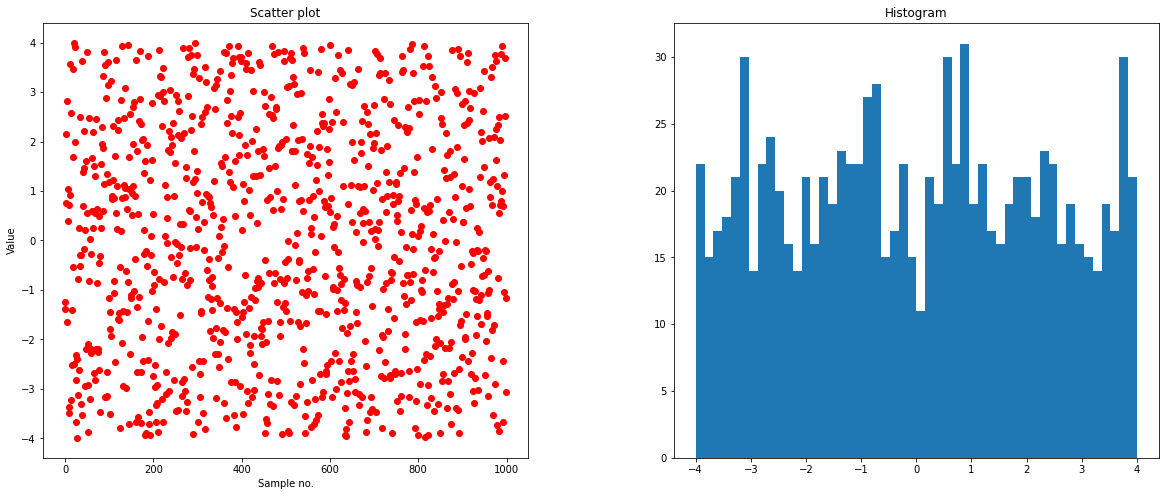

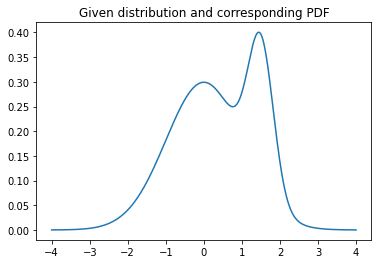

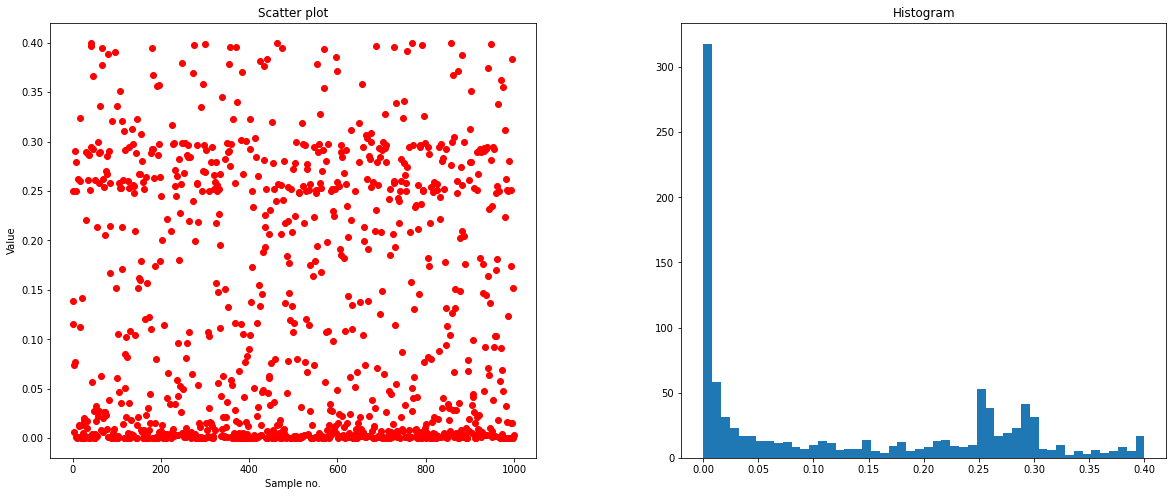

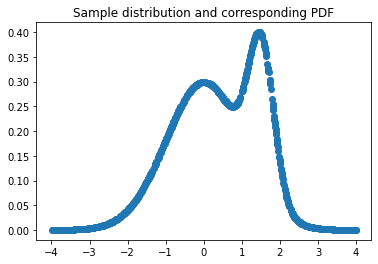

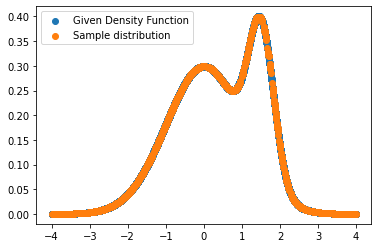

In [8]:
N = 30000
n = 1000
X1 = generateNormalDist(N)
funcValue = reqFunction(X1)
X_dash, Sample = Sampling(n,funcValue,X1)

plotScatterHist(X_dash)
X1.sort()

plt.title("Given distribution and corresponding PDF")
plt.plot(X1,funcValue)
plt.show()

plotScatterHist(Sample)

plt.title("Sample distribution and corresponding PDF")
plt.scatter(X_dash,Sample)
plt.show()

plt.scatter(X1,funcValue,label = "Given Density Function")
plt.scatter(X_dash,Sample,label = "Sample distribution")
plt.legend()
plt.show()
#X_dash.sort()
#Sample.sort()


In [9]:
def GaussKernel(t):
    return (1/math.sqrt(2*math.pi))*(math.exp(-(t*t)/(2)))

def RectKernel(t):
    if abs(t)<1:
        return 0.5
    else:
        return 0

def epanechnikov(t):
    if abs(t)<math.sqrt(5):
        return 0.75*(1-(t*t)/math.sqrt(5))
    else:
        return 0

def biweight(t):
    if abs(t)<1:
        return (15/16)*(1-(t*t))*(1-(t*t))  

In [10]:
def kernelDensityEstimate(h,X,kernel):
    K = np.zeros(X.size)
    P = np.zeros(X.size)
    
    if kernel=="epanechnikov":
        for i in range(X.size):
            for j in range(X.size):
                K[i] = K[i]+ epanechnikov((X[i]-X[j])/h)
            P[i] = (1/(n*h))*K[i]
    
    elif kernel=="biweight":
        for i in range(X.size):
            for j in range(X.size):
                K[i] = K[i]+ biweight((X[i]-X[j])/h)
            P[i] = (1/(n*h))*K[i]
    
    elif kernel=="rectangle":
        for i in range(X.size):
            for j in range(X.size):
                K[i] = K[i]+ RectKernel((X[i]-X[j])/h)
            P[i] = (1/(n*h))*K[i]
    else:
        for i in range(X.size):
            for j in range(X.size):
                K[i] = K[i]+ GaussKernel((X[i]-X[j])/h)
            P[i] = (1/(n*h))*K[i]
    
    return P

In [11]:
def plotKernel(P1,P2,P3,P4,P5,X_dash,title,mode):
    plt.figure(figsize = (10,8))
    plt.title(title)
    if mode==1:
        plotter(Sample)
    X_dash.sort()
    plt.plot(X_dash,P1,label = "h=0.06")
    plt.plot(X_dash,P2,label = "h=0.54")
    plt.plot(X_dash,P3,label = "h=0.18")
    plt.plot(X_dash,P4,label = "h=1")
    plt.plot(X_dash,P5,label = "h=10")
    plt.legend()
    plt.show()

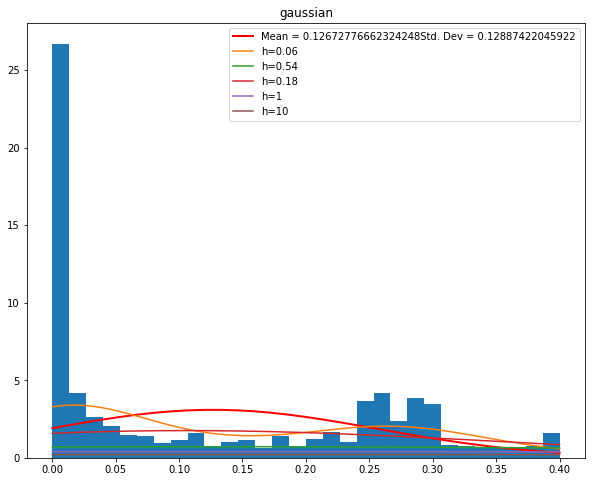

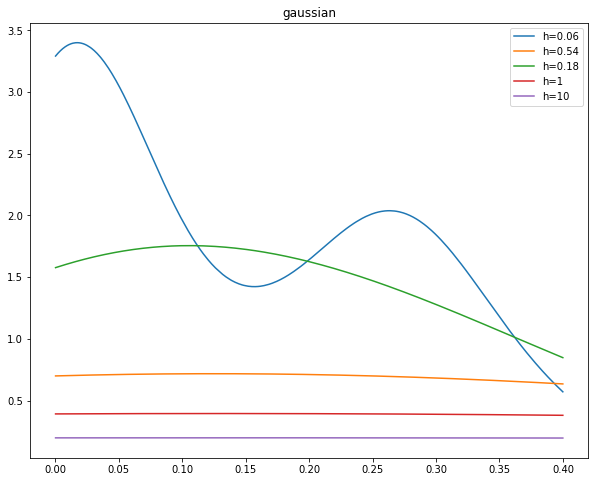

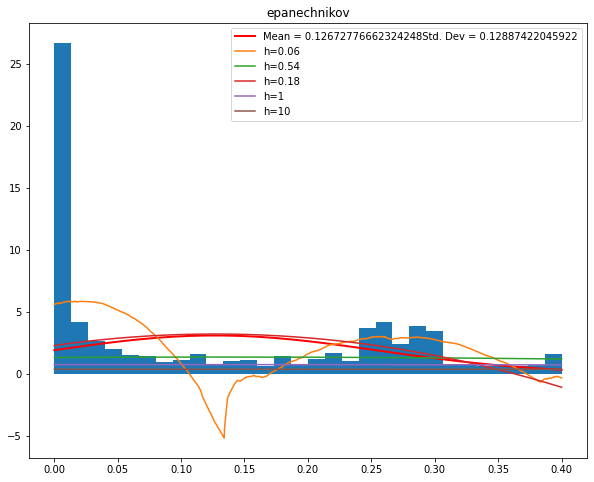

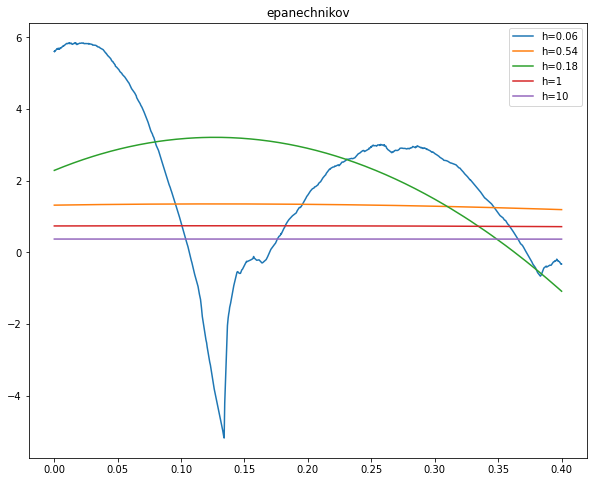

In [13]:
title = ["gaussian","epanechnikov"]
for i in title:
    P1 = kernelDensityEstimate(0.06,Sample,i)
    P2 = kernelDensityEstimate(0.54,Sample,i)
    P3 = kernelDensityEstimate(0.18,Sample,i)
    P4 = kernelDensityEstimate(1,Sample,i)
    P5 = kernelDensityEstimate(2,Sample,i)
    plotKernel(P1,P2,P3,P4,P5,Sample,i,1)
    plotKernel(P1,P2,P3,P4,P5,Sample,i,0)    